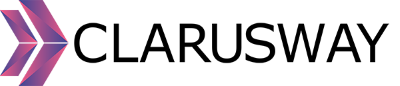


<div class="alert alert-block alert-danger">

# <span style=" color:Purple">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>




<div class="alert alert-block alert-success ">

## <span style=" color:Purple">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# Tasks
</span>





<div class="alert alert-block alert-info">
<span style=" color:Purple">1. Import Libraries
</span>

In [65]:
# Basic Libraries
import pandas as pd
import numpy as np

# Libraries for visualizaton
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

<div class="alert alert-block alert-info">
<span style=" color:Purple">2. Read Dataset
</span>

In [66]:
df=pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-block alert-info">
<span style=" color:Purple">3. Check missing values and if there are any dublicate rows or not.
</span>

In [69]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [70]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<div class="alert alert-block alert-info">
<span style=" color:Purple">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


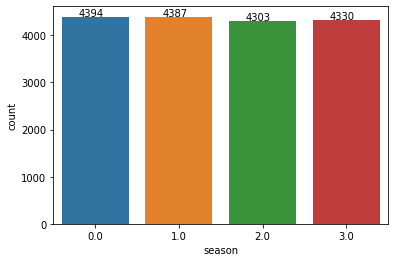

In [74]:
# season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

ax = sns.countplot(x='season',data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));


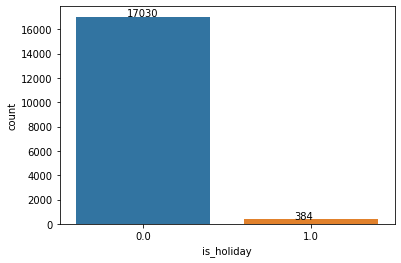

In [78]:
# is_holiday
ax = sns.countplot(x='is_holiday',data=df)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+20));

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

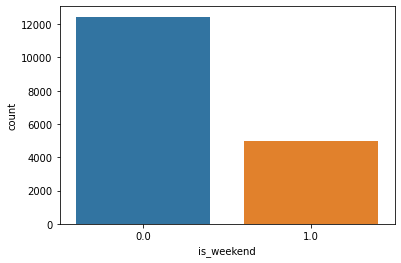

In [79]:
# is_weekend
sns.countplot(x='is_weekend',data=df)

<AxesSubplot:xlabel='weather_code', ylabel='count'>

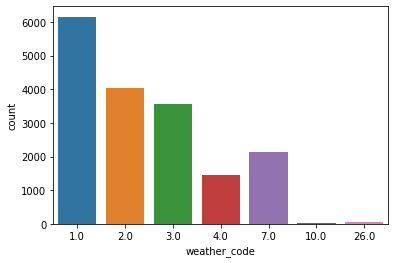

In [80]:
# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-block alert-info">
<span style=" color:Purple">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [82]:
df.timestamp = pd.to_datetime(df.timestamp)

In [83]:
df.set_index('timestamp',inplace=True)
df.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


- Tam 2 yillik bir timestamp var. year, month, day_of_month, day_of_week, hour bilgilerini alarak feature engineering yapalim

<div class="alert alert-block alert-info">
<span style=" color:Purple">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

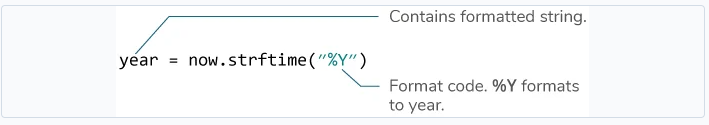

In [86]:
f = lambda x: x.strftime('%Y-%m') # strftime works with array

df['year_month'] =  f(df.index)
df['year'] = df.index.year  # only apply to array
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek

df["day_of_name"] = df.index.day_name()

df['hour'] = df.index.hour

df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2


In [88]:
# Alternative Solution
import datetime as dt

df2  =pd.read_csv('store_sharing.csv')

df2['timestamp'] =  pd.to_datetime(df2['timestamp'], infer_datetime_format=True)

df2["Year"] = df2['timestamp'].dt.year
df2["Month"] = df2['timestamp'].dt.month
df2["Day"] = df2['timestamp'].dt.day
df2["day_of_week"] = df2['timestamp'].dt.dayofweek

df2["Hour"] = df2['timestamp'].dt.hour

df2["year-month"] = df2['timestamp'].apply(lambda x: x.strftime('%Y-%m'))

df2.set_index('timestamp',inplace=True)
df2.head(3)


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,day_of_week,Hour,year-month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2,2015-01


<div class="alert alert-block alert-info">
<span style=" color:Purple">7. Visualize the correlation with a heatmap
</span>

<AxesSubplot:>

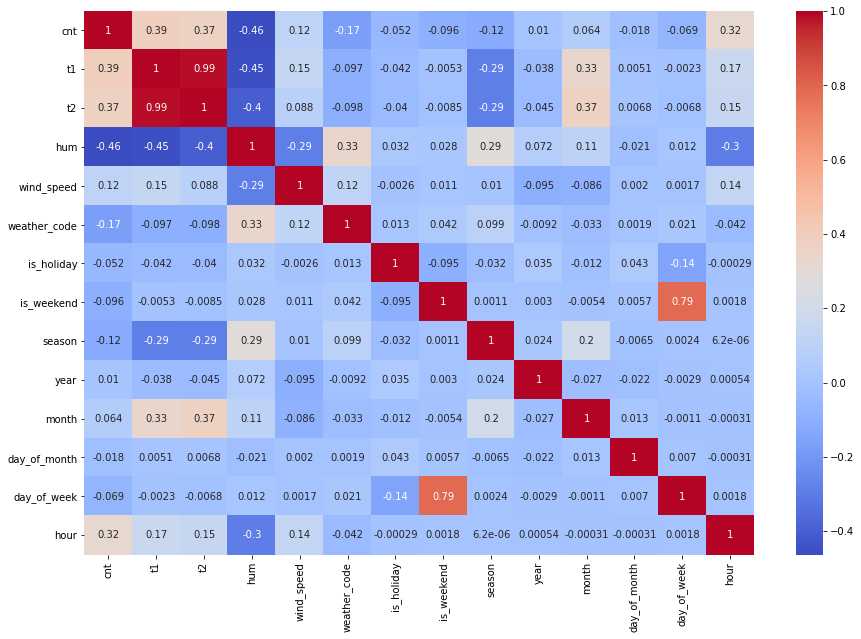

In [90]:
# for all variables 

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

In [91]:
df_corr_cnt = df.corr()[['cnt']].sort_values(by='cnt', ascending=False)
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


<AxesSubplot:>

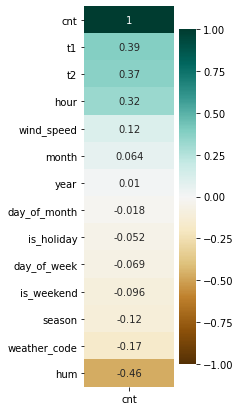

In [93]:
# for the target variable
plt.figure(figsize=(2, 7))
sns.heatmap(df_corr_cnt, vmin=-1, vmax=1, annot=True, cmap='BrBG')

<div class="alert alert-block alert-info">
<span style=" color:Purple">8. Visualize the correlation of the target variable and the other features with barplot
</span>

<AxesSubplot:>

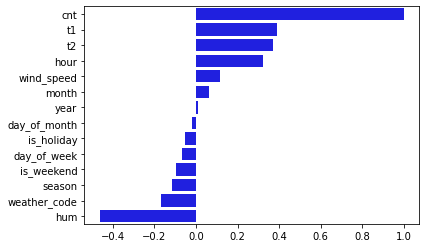

In [94]:
x = df.corr()["cnt"].sort_values(ascending=False).index
y = df.corr()["cnt"].sort_values(ascending=False).values

sns.barplot(y,x, orient="h", color="b" )

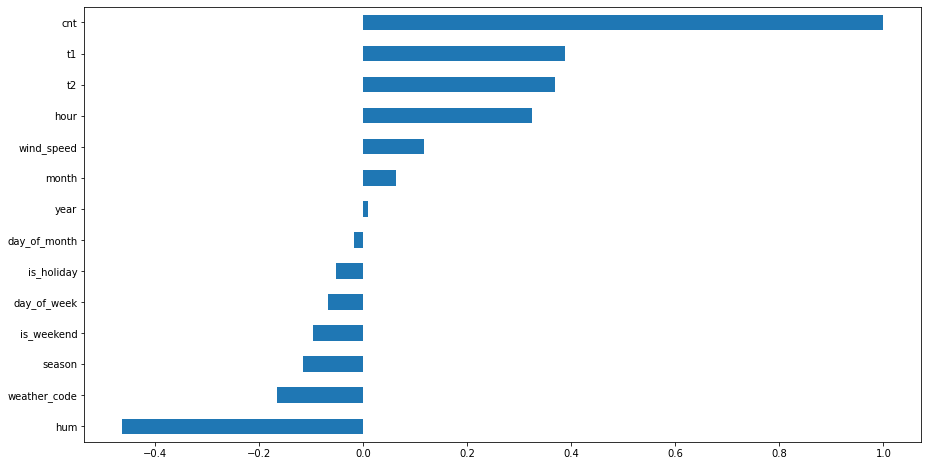

In [96]:
# Alternative Solution

plt.figure(figsize=(15,8))
df.corr()["cnt"].sort_values().plot.barh();

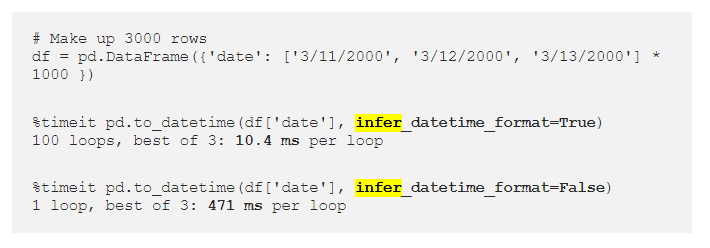

<div class="alert alert-block alert-info">
<span style=" color:Purple">9. Plot bike shares over time use lineplot.
</span>

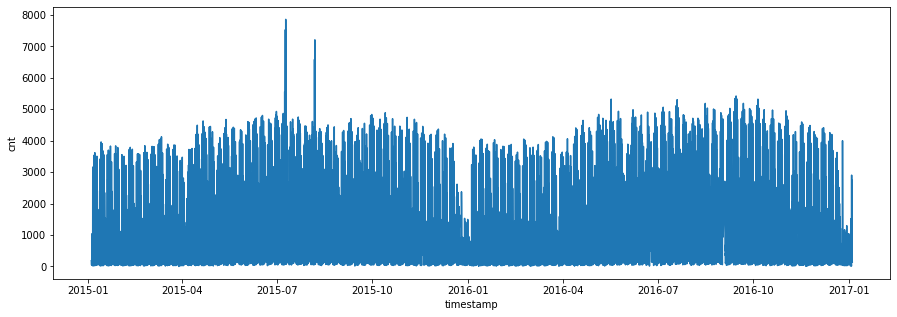

In [97]:
plt.figure(figsize=(15, 5))

sns.lineplot(x=df.index, y='cnt',data=df)
plt.show()

# https://www.cyclinguk.org/publication/cycle-campaign-news-cycledigest/cycle-campaign-news-march-2015

<div class="alert alert-block alert-info">
<span style=" color:Purple">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [98]:
df_sum = pd.DataFrame(df.groupby('year_month').cnt.sum())
df_sum

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


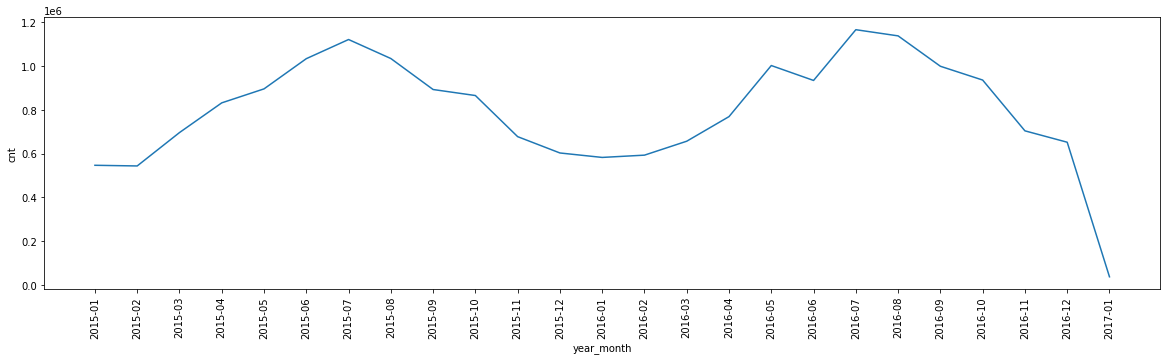

In [100]:
plt.figure(figsize=(20, 5))

sns.lineplot(x='year_month', y='cnt',data=df_sum)

plt.xticks(rotation=90);

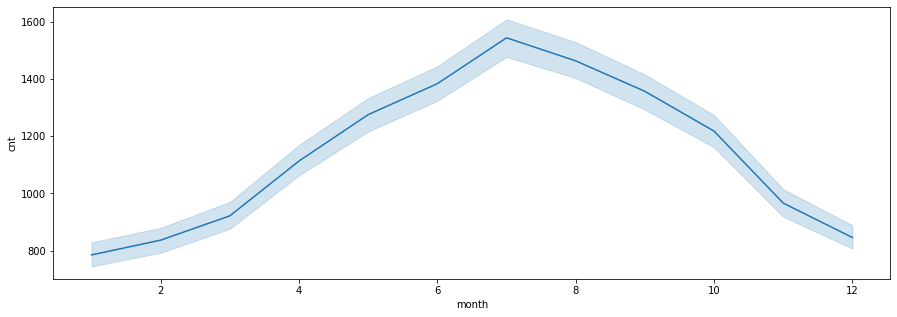

In [101]:
# with lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='cnt',data=df);

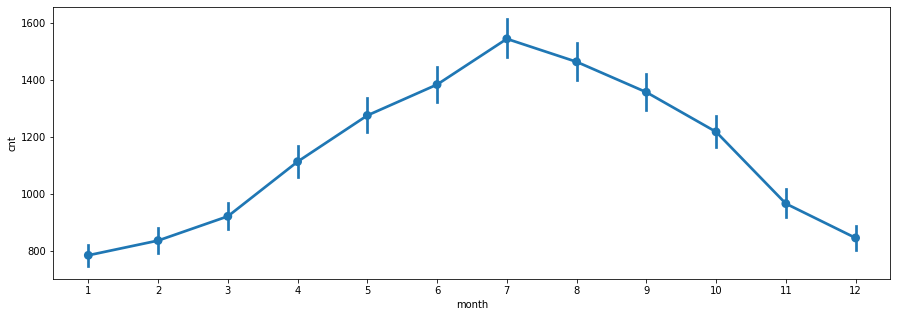

In [102]:
# with pointplot

plt.figure(figsize=(15,5))
sns.pointplot(x="month", y ="cnt", data=df);

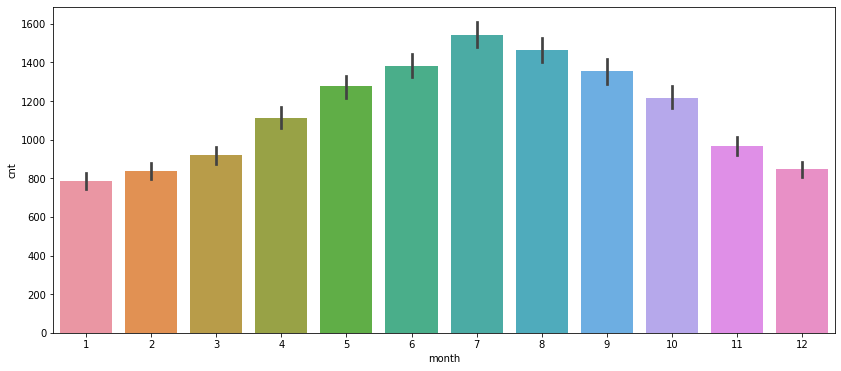

In [103]:
# with barplot

plt.figure(figsize=(14,6))
sns.barplot(x="month",y="cnt",data=df);

<div class="alert alert-block alert-info">
<span style=" color:Purple">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

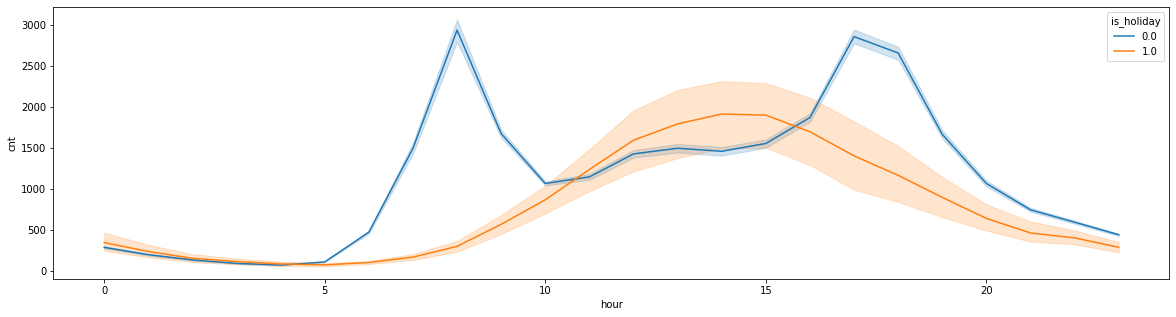

In [104]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(20, 5))
sns.lineplot(x='hour', y='cnt',data=df, hue='is_holiday');

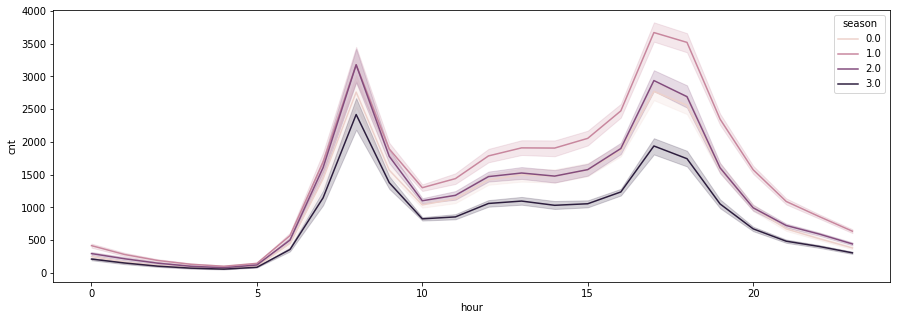

In [105]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(15, 5))
sns.lineplot(x='hour', y='cnt',data=df, hue='season')
plt.show()

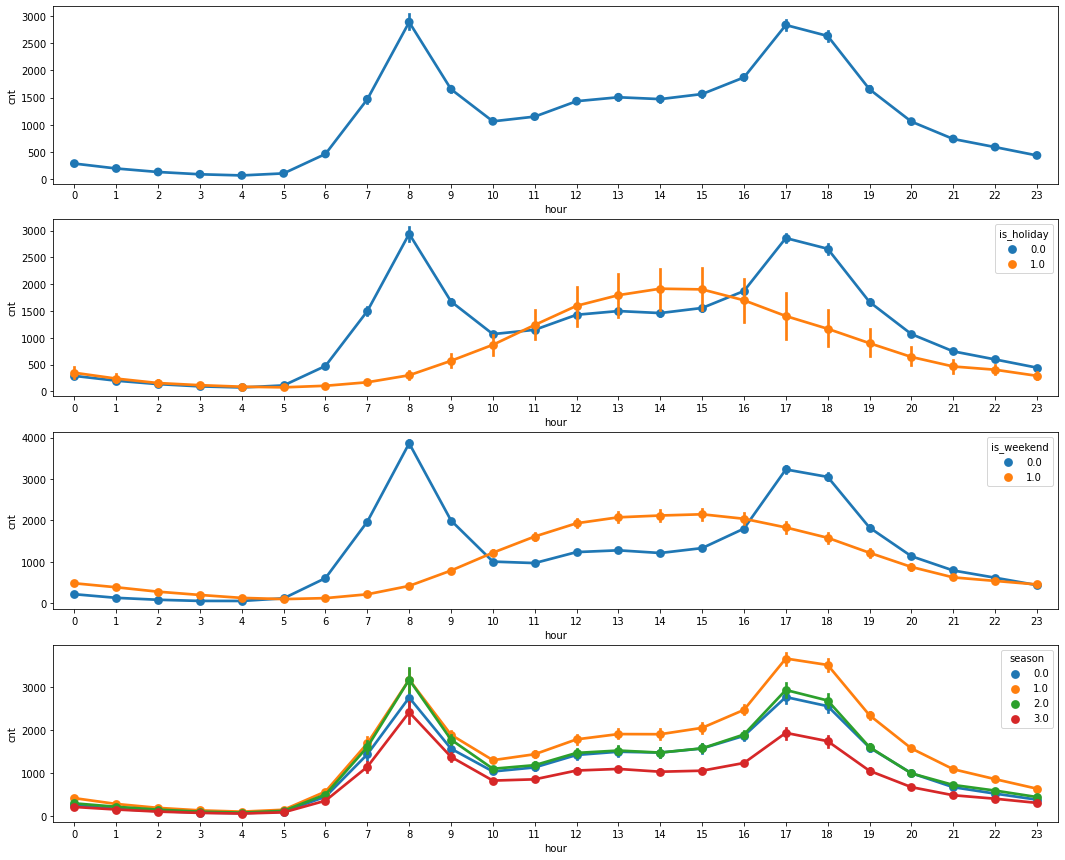

In [106]:
# with pointplot
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4, figsize=(18,15)  )

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)

sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax4);

<div class="alert alert-block alert-info">
<span style=" color:Purple"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

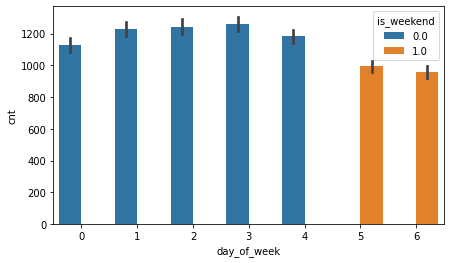

In [107]:
# with barplot

plt.figure(figsize=(7,4))

sns.barplot(x="day_of_week",y="cnt",data=df, hue='is_weekend');

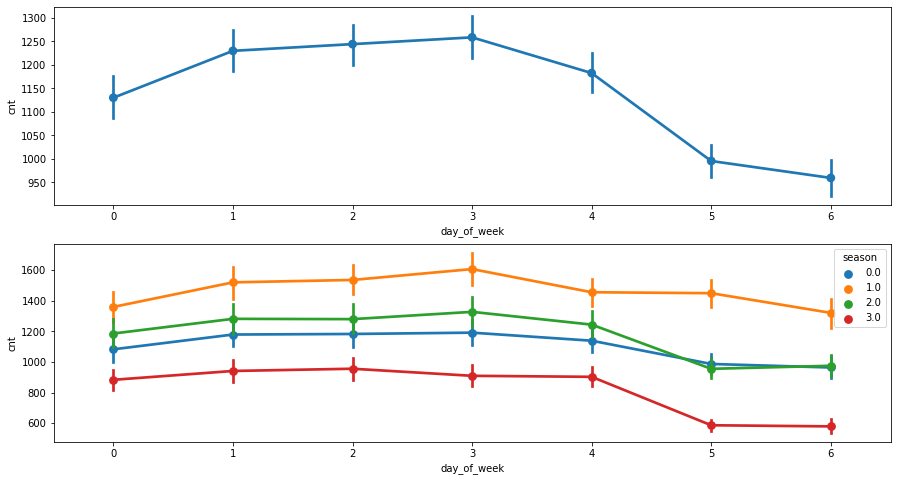

In [108]:
# with pointplot

fig,(ax1, ax2)= plt.subplots(nrows=2)
fig.set_size_inches(15,8)  # figzise=(15,8)

sns.pointplot(data=df, x='day_of_week', y='cnt',ax=ax1)
sns.pointplot(x="day_of_week",y="cnt", data = df,hue="season",ax=ax2)
plt.show()

<div class="alert alert-block alert-info">
<span style=" color:Purple"> 13. Plot bike shares by day of month
</span>

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

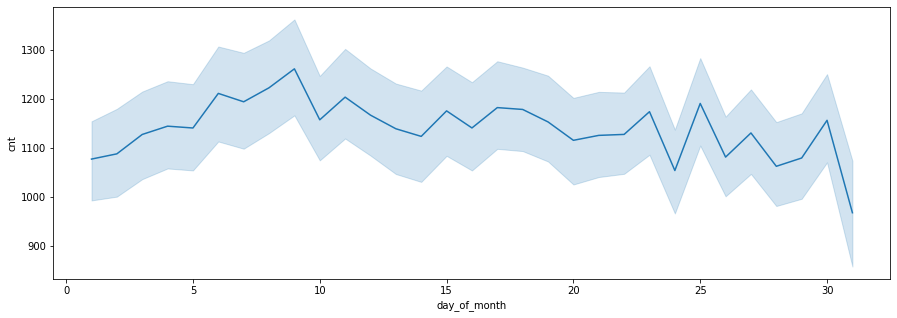

In [109]:
#with lineplot

plt.figure(figsize=(15, 5))
sns.lineplot(x='day_of_month', y='cnt',data=df)


In [112]:
pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x:round(x))).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


<div class="alert alert-block alert-info">
<span style=" color:Purple"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

In [61]:
# with barplot

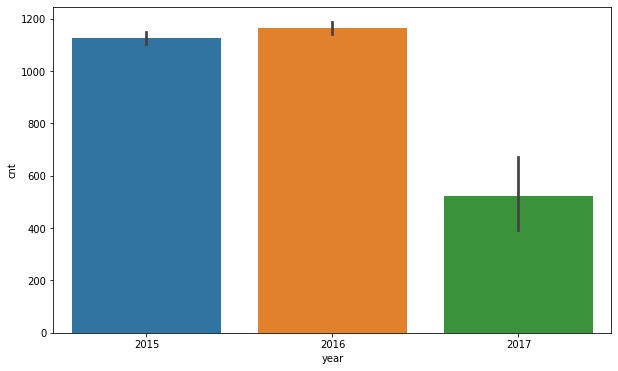

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(x="year",y="cnt",data=df);

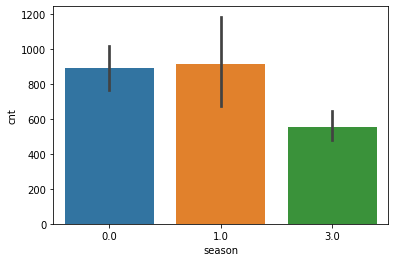

In [114]:
sns.barplot(x="season",y="cnt", data = df[df["is_holiday"]==1]);

<div class="alert alert-block alert-info">
<span style=" color:Purple">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [115]:
df.is_weekend.value_counts().values

array([12444,  4970], dtype=int64)

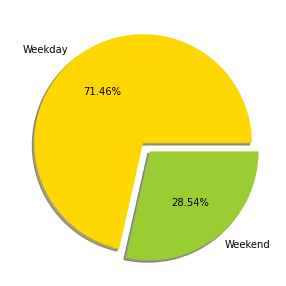

In [117]:
fig, ax = plt.subplots(figsize=(5,5))

colors_list = ['gold', 'yellowgreen']
explode_list = [0, 0.1]

ax.pie(x=df.is_weekend.value_counts().values, 
       labels=['Weekday','Weekend'], 
       autopct='%.2f%%', shadow=True, colors=colors_list, explode=explode_list  
       )
plt.show()

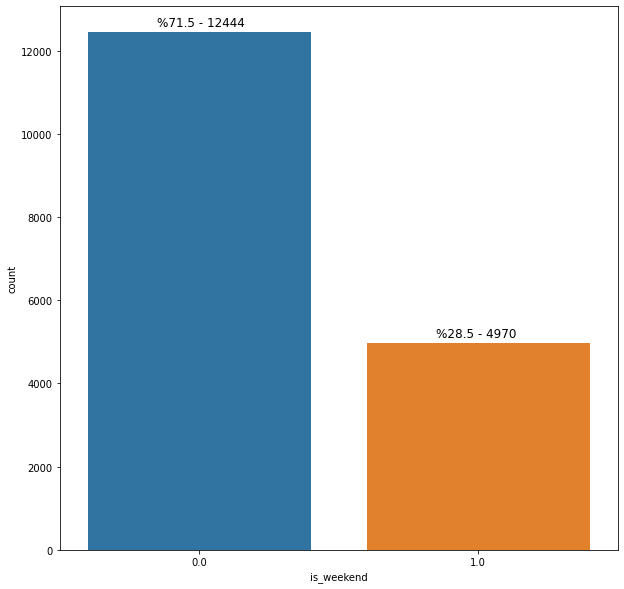

In [118]:
#Alternative Solution

fig, ax = plt.subplots(figsize=(10,10))

ax = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.25 , bar.get_height()+150) ,
                    size=12)

<div class="alert alert-block alert-info">
<span style=" color:Purple">16. Plot the distribution of weather code by seasons
</span>

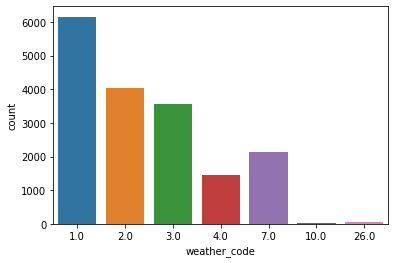

In [119]:
# with seaborn countplot
sns.countplot(x="weather_code",data=df);

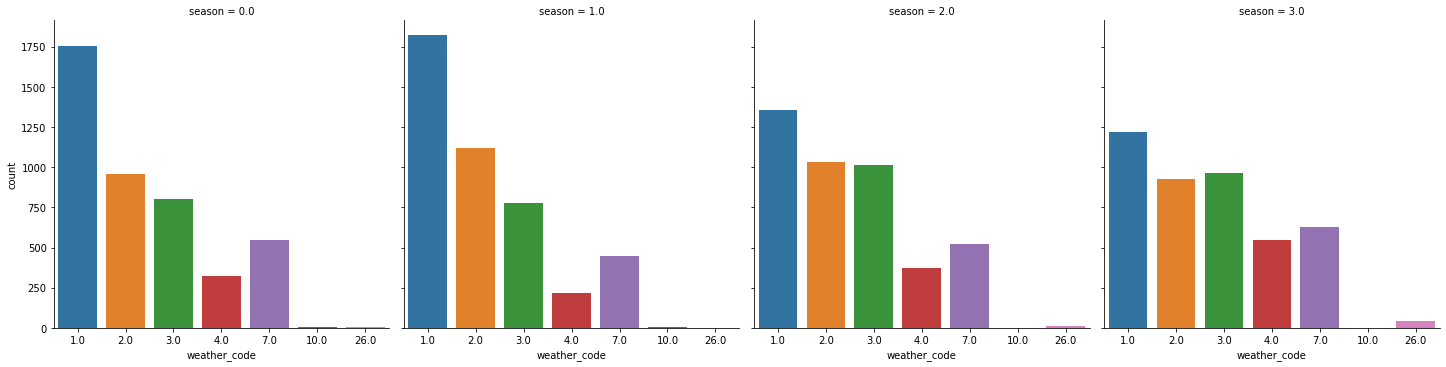

In [120]:
# with catplot
g = sns.catplot(x="weather_code", col="season", data=df, kind='count')

<div class="alert alert-block alert-danger">

# <span style=" color:Purple">Conclusions
    
- 
- 
    

</span>

<div class="alert alert-block alert-info">
<span style=" color:Purple">Thanks for Attending!..
    

</span>

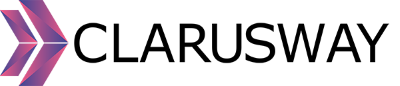